# <center>Test Tasks - Fluid mixtures properties determination</center>

*Taras Lozovskyi*, 01/2023

In [1]:
# Imports
import numpy as np
import CoolProp.CoolProp as CP
from TaskUtilites import get_psat, get_tsat, get_conductivity, get_viscosity, plotdata, plotdata2, plotdata3, plotdata4, plotdata5

## Task 1

Determine the temperature, at which the condensed phase of water vapor and ethylene glycol 50/50 mixture will have a composition 70/30 at the pressure of 2 atmospheres. Calculate the thermodynamic and transport properties of the condensate.

*Определите температуру, при которой конденсированая фаза смеси водяного пара и этиленгликоля 50/50 будет иметь состав 70/30 при давлении 2 атмосферы. Рассчитайте термодинамические и транспортные свойства конденсата.*

#### Анализ задачи и допущения

Объектом является бинарная двухфазная термодинамическая система, находящаяся в равновесии.
Для этой системы задано три параметра: давление ($P$), состав жидкой фазы ($x_{water}$, $x_{ethylene glycol}$), состав паровой фазы ($y_{water}$, $y_{etylene glycol}$).

Согласно правилу фаз Гиббса двухфазная бинарная термодинамическая система имеет две степени свободы, поэтому для определения равновесной температуры достаточно использовать два заданных параметра. Из трёх возможных вариантов оставить два параметра только два варианта могут быть физически непротиворечивыми: ($P$, $x_{water}$), ($P$, $y_{water}$). Третий вариант когда задаётся набор ($x_{water}$, $y_{water}$) не возможен при заданных значениях состава фаз. Т.к. для системы вода/этиленгликоль доля воды в паровой фазе всегда больше чем в жидкой. Это связано с тем, что вода является легколетучим компонентом этой системы.

Имеем два варианта корректной постановки задачи:
* **Task 1.1** - Определить температуру равновесной системы вода/этиленгликоль при давлении $P=2 atm$ и концентрации воды в жидкой фазе $x_{water}=0.7$. Для жидкой фазы рассчитать термодинамические и транспортные свойства.
* **Task 1.2** - Определить температуру и состав жидкой фазы для равновесной системы вода/этиленгликоль при давлении $P=2 atm$ и концентрации воды в паровой фазе $x_{water}=0.5$. Для жидкой фазы рассчитать термодинамические и транспортные свойства.

Из условия неясно в каких единицах указана концентрация компонентов. Ввиду того, что в технических приложениях в основном используют массовые доли, в дальнейшем примем что заданы массовые доли компонентов смеси.

#### Task 1.1

In [2]:
# Исходные данные
Mix1 = 'Water' + '&' + 'EthyleneGlycol'
Pmix = 2*101325  # Pa
x1 = 0.7    # kg/kg — массовая доля компонента 1
x2 = 1 - x1 # kg/kg — массовая доля компонента 2

Для решения поставленной задачи необходимо иметь уравнение состояние для соответствующей смеси.
В качестве такого удобно воспользоваться готовым уравнением состояния в базе данных свойств веществ [`REFPROP 10.0`](#REFPROP-10.0) (NIST).

Из уравнения состояния на соответствующей изобаре насыщенной жидкой фазы при заданном составе находим равновесную температуру в системе (см. [`рис. 1`](#Рис.-1)). Так же зная давление и состав жидкой фазы можно определить остальные свойства.

In [3]:
# Термодинамические свойства

REFPROP = CP.AbstractState("REFPROP", Mix1)

# Задаём массовую концентрацию компонентов в жидкой фазе
REFPROP.set_mass_fractions([x1, x2])
REFPROP.update(CP.PQ_INPUTS, Pmix, 0)

# Температура насыщения для жидкой фазы
Tsat1 = REFPROP.T()-273.15
print('Температура системы                -', np.round(Tsat1,2), '\tC')

# Плотность жидкой фазы
Dl1 = REFPROP.rhomass()
print('Плотность жидкой фазы              -', np.round(Dl1,2), ' \tkg/m^3')

# Внутренняя энергия жидкой фазы
Ul1 = REFPROP.umass()*1e-3
print('Внутренняя энергия жидкой фазы     -', np.round(Ul1,2), '\tkJ/kg')

# Энтальпия жидкой фазы
Hl1 = REFPROP.hmass()*1e-3
print('Энтальпия жидкой фазы              -', np.round(Hl1,2), '\tkJ/kg')

# Энтропия жидкой фазы
Sl1 = REFPROP.smass()*1e-3
print('Энтропия жидкой фазы               -', np.round(Sl1,4), '\tkJ/kg/K')

# Изохорная теплоемкость жидкой фазы
Cvl1 = REFPROP.cvmass()*1e-3
print('Изохорная теплоемкость жидкой фазы -', np.round(Cvl1,4), ' \tkJ/kg/K')

# Изобарная теплоемкость жидкой фазы
Cpl1 = REFPROP.cpmass()*1e-3
print('Изобарная теплоемкость жидкой фазы -', np.round(Cpl1,4), '\tkJ/kg/K')

Температура системы                - 124.48 	C
Плотность жидкой фазы              - 974.0  	kg/m^3
Внутренняя энергия жидкой фазы     - 314.54 	kJ/kg
Энтальпия жидкой фазы              - 314.75 	kJ/kg
Энтропия жидкой фазы               - 1.1159 	kJ/kg/K
Изохорная теплоемкость жидкой фазы - 3.314  	kJ/kg/K
Изобарная теплоемкость жидкой фазы - 3.8558 	kJ/kg/K


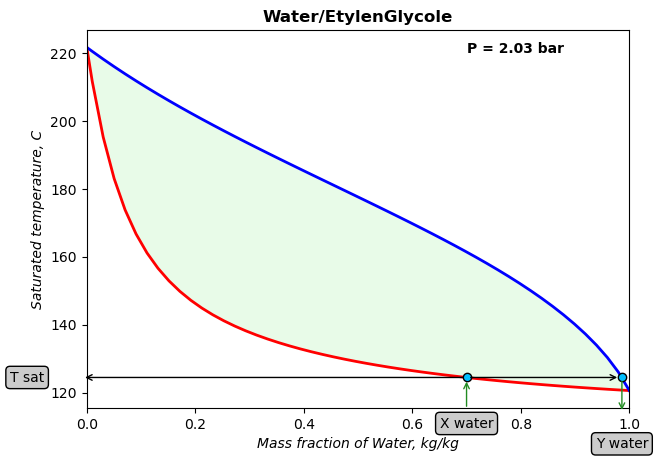

In [4]:
# Состав паровой фазы
REFPROP.set_mole_fractions(REFPROP.mole_fractions_vapor())
REFPROP.update(CP.PQ_INPUTS, Pmix, 1)
y1_t11 = REFPROP.get_mass_fractions()[0]

# Расчёт данных и построение графика
dt = get_tsat(REFPROP, Pmix, [0, 1])
for mf in [[i, 1-i] for i in np.linspace(0.01,1,50)]:
    dt = np.append(dt, get_tsat(REFPROP, Pmix, mf), axis=0)

plotdata2(Pmix, x1, y1_t11, Tsat1, dt) # строим график


##### Рис. 1

#### Task 1.2

Аналогично, если в качестве исходных данных задан состав паровой фазы.

In [5]:
# Исходные данные
y1 = 0.5    # kg/kg — массовая доля компонента 1
y2 = 1 - y1 # kg/kg — массовая доля компонента 2

Из уравнения состояния на соответствующей изобаре насыщенной паровой фазы при заданном составе находим равновесную температуру в системе и состав жидкой фазы (см. [`рис. 2`](#Рис.-2)). Зная давление и состав жидкой фазы можно определить остальные свойства.

In [6]:
# Термодинамические свойства

# Задаём массовую концентрацию компонентов
REFPROP.set_mass_fractions([y1, y2])
REFPROP.update(CP.PQ_INPUTS, Pmix, 1)

# Температура насыщения для жидкой фазы
Tsat2 = REFPROP.T()-273.15
print('Температура системы                -', np.round(Tsat2,2), '\tC')

# Состав жидкой фазы
REFPROP.set_mole_fractions(REFPROP.mole_fractions_liquid())
REFPROP.update(CP.PQ_INPUTS, Pmix, 0)
x1_t12 = REFPROP.get_mass_fractions()[0]
print('Концентрация воды в жидкой фазе    -', np.round(x1_t12,4), '\tkg/kg')

# Плотность жидкой фазы
Dl2 = REFPROP.rhomass()
print('Плотность жидкой фазы              -', np.round(Dl2,2), '\tkg/m^3')

# Внутреняя энергия жидкой фазы
Ul2 = REFPROP.umass()*1e-3
print('Внутренняя энергия жидкой фазы     -', np.round(Ul2,3), '\tkJ/kg')

# Энтальпия жидкой фазы
Hl2 = REFPROP.hmass()*1e-3
print('Энтальпия жидкой фазы              -', np.round(Hl2,3), '\tkJ/kg')

# Энтропия жидкой фазы
Sl2 = REFPROP.smass()*1e-3
print('Энтропия жидкой фазы               -', np.round(Sl2,4), '\tkJ/kg/K')

# Изохорная теплоемкость жидкой фазы
Cvl2 = REFPROP.cvmass()*1e-3
print('Изохорная теплоемкость жидкой фазы -', np.round(Cvl2,4), '\tkJ/kg/K')

# Изобарная теплоемкость жидкой фазы
Cpl2 = REFPROP.cpmass()*1e-3
print('Изобарная теплоемкость жидкой фазы -', np.round(Cpl2,4), '\tkJ/kg/K')

Температура системы                - 177.63 	C
Концентрация воды в жидкой фазе    - 0.0616 	kg/kg
Плотность жидкой фазы              - 988.02 	kg/m^3
Внутренняя энергия жидкой фазы     - -5.141 	kJ/kg
Энтальпия жидкой фазы              - -4.936 	kJ/kg
Энтропия жидкой фазы               - 0.0952 	kJ/kg/K
Изохорная теплоемкость жидкой фазы - 2.6552 	kJ/kg/K
Изобарная теплоемкость жидкой фазы - 3.1738 	kJ/kg/K


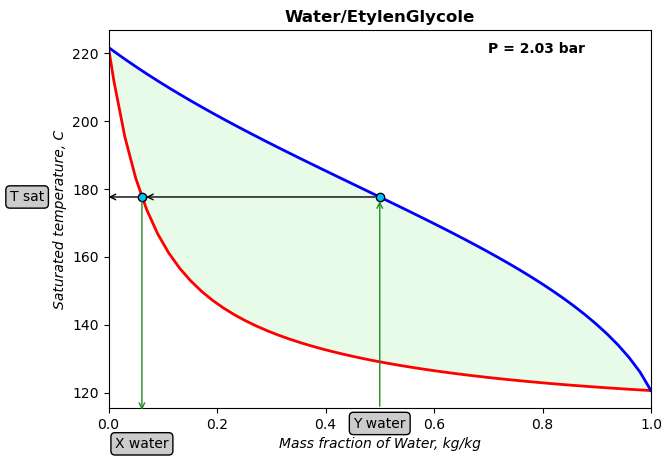

In [7]:
# Расчёт данных и построение графика
dt = get_tsat(REFPROP, Pmix, [0, 1])
for mf in [[i, 1-i] for i in np.linspace(0.01,1,50)]:
    dt = np.append(dt, get_tsat(REFPROP, Pmix, mf), axis=0)

plotdata3(Pmix, x1_t12, y1, Tsat2, dt) # строим график

##### Рис. 2

#### Транспортные свойства

Использовать для определения транспортных свойств модели имеющиеся в [`CoolProp`](#CoolProp) и [`REFPROP 10.0`](#REFPROP-10.0) в данном случае не представляется возможным. Так в CoolProp применимость моделей ограничена максимальной температурой 100С. В [`REFPROP 10.0`](#REFPROP-10.0) допустимый диапазон концентраций ограничен 5% мол.
Поэтому для определения транспортных свойств можно рекомендовать следующие подходы, в зависимости от выдвигаемых требований к неопределенности получаемых значений и к универсальности используемых моделей.
1) Воспользоваться справочными данными по свойствам вторичных теплоносителей на базе гликолей при атмосферном давлении, приведенный например в [`ASHARAE Handbook 2021`](#ASHARAE-Handbook-2021). Возможность использования этих данных обусловлена слабым влиянием давления на плотность и транспортные свойства. Стоит отметить что в указанном справочнике информация приведена в табличном виде и не удобна для использования в задачах моделирования теплотехнических систем.
2) Выполнить обзор доступных экспериментальных данных по данной смеси и рекомендуемых моделей для обобщения транспортных свойств.
3) Воспользоваться методами прогнозирования на основе данных по чистым компонентам раствора, приведенных, например, в [`Рид 1982`](#Рид-1982).

Т.к. в поставленной задаче не указаны требования к неопределенности результатов расчёта и универсальности применяемых моделей был выбран третий подход.

##### Теплопроводность
Для прогнозирования теплопроводности жидких смесей в [`Рид 1982`](#Рид-1982) рекомендуется уравнение Ли. Автор указывает, что неопределенность спрогнозированных значений теплопроводности не превосходит 3-4% в том числе для растворов ассоциированных веществ. Такое значение неопределенности соизмеримо с неопределенностями экспериментальных методов.
$$\lambda_{mix}=\Phi_1^2\lambda_1+\Phi_1\Phi_2\lambda_{12}+\Phi_2^2\lambda_2$$
$$\lambda_{12}={2 \over 1/\lambda_1+1/\lambda_2}$$
$$\Phi_1={x_1V_1 \over x_1V_1+x_2V_2}, \Phi_2={x_2V_2 \over x_1V_1+x_2V_2}$$
где $\lambda_i$ - теплопроводность чистых компонентов, $x_i$ - vмольная доля компонентов, $\Phi_i$ - объемная доля компонентов, $V_i$ - мольный объем чистых компонентов.
Проверка применимости данной модели на доступных данных в [`ASHARAE Handbook 2021`](#ASHARAE-Handbook-2021) показала максимальное отклонение спрогнозированых значений теплопроводности от справочных <9%. Такое увеличение ошибки прогнозирования в сравнении с данными [`Рид 1982`](#Рид-1982) возможно обусловлено тем, что данные в [`ASHARAE Handbook 2021`](#ASHARAE-Handbook-2021) относятся не к бинарной смеси вода/этиленгликоль, а к многокомпонентной смеси содержащей ингибиторы корозии (до 5% масс.).

###### Task 1.1

In [8]:
REFPROP = CP.AbstractState("REFPROP", Mix1)

# Задаём массовую концентрацию компонентов в жидкой фазе
REFPROP.set_mass_fractions([x1, x2])
REFPROP.update(CP.PQ_INPUTS, Pmix, 0)
# Соответствующая мольная концентрация компонентов в жидкой фазе
xmole = REFPROP.mole_fractions_liquid()

# Свойства чистых компонентов
# - вода
REFPROP_W = CP.AbstractState("REFPROP", "Water")
REFPROP_W.update(CP.QT_INPUTS, 0, Tsat1+273.15)
V1    = 1/REFPROP_W.rhomolar()
Lmbd1 = REFPROP_W.conductivity()
# - этиленгликоль
REFPROP_EG = CP.AbstractState("REFPROP", "EthyleneGlycol")
REFPROP_EG.update(CP.QT_INPUTS, 0, Tsat1+273.15)
V2    = 1/REFPROP_EG.rhomolar()
Lmbd2 = REFPROP_EG.conductivity()

# Объемные доли
F1 = xmole[0]*V1 / (xmole[0]*V1 + xmole[1]*V2)
F2 = xmole[1]*V2 / (xmole[0]*V1 + xmole[1]*V2)

# Теплопроводность
Lmbd12 = 2 / (1/Lmbd1+1/Lmbd2)
Lmbd_mix1 = F1**2*Lmbd1 + 2*F1*F2*Lmbd12 + F2**2*Lmbd2
print("Теплопроводность жидкой фазы -",np.round(Lmbd_mix1,4),"W/m/K")

Теплопроводность жидкой фазы - 0.5238 W/m/K


###### Task 1.2

Аналогично прогнозируем теплопроводность жидкой фазы для второго варианта условия, при найденном значении концентрации воды. Результаты этих расчётов показаны на [`рис. 3`](#Рис.-3).

In [9]:
Lmbd_mix2 = get_conductivity('Water', 'EthyleneGlycol', Tsat2, [x1_t12, 1-x1_t12])[0][1]
print("Теплопроводность жидкой фазы -",np.round(Lmbd_mix2,4),"W/m/K")

Теплопроводность жидкой фазы - 0.2696 W/m/K


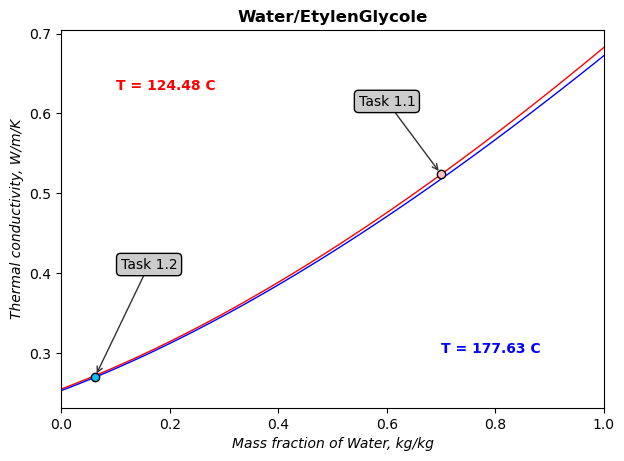

In [10]:
# Расчёт данных и построение графика
dt1 = get_conductivity('Water', 'EthyleneGlycol', Tsat1, [0, 1])
for mf in [[i, 1-i] for i in np.linspace(0.01,1,50)]:
    dt1 = np.append(dt1, get_conductivity('Water', 'EthyleneGlycol', Tsat1, mf), axis=0)

dt2 = get_conductivity('Water', 'EthyleneGlycol', Tsat2, [0, 1])
for mf in [[i, 1-i] for i in np.linspace(0.01,1,50)]:
    dt2 = np.append(dt2, get_conductivity('Water', 'EthyleneGlycol', Tsat2, mf), axis=0)

plotdata4([x1, x1_t12], [Tsat1, Tsat2], Lmbd_mix1, Lmbd_mix2, dt1, dt2)

##### Рис. 3

##### Вязкость кинематическая

Для определения кинематической вязкости жидкой фазы смеси применим аналогичный подход.
В [`Рид 1982`](#Рид-1982) для прогнозирования кинематической вязкости смеси жидкостей рекомендуется уравнение Лобе.
$$\nu_{mix}=\Phi_1\nu_1\exp(\Phi_2\alpha_2^*)+\Phi_2\nu_2\exp(\Phi_1\alpha_1^*)$$
$$\alpha_1^*=-1.7\ln({\nu_2 \over \nu_1})$$
$$\alpha_2^*=0.27\ln({\nu_2 \over \nu_1})+\sqrt{1.3\ln({\nu_2 \over \nu_1})}$$
где $\nu_i$ - кинематическая вязкость чистых компонентов, $\Phi_i$ - объемная доля компонентов, $\alpha_i^*$ - характеристический параметр вязкости для компонента $i$.

###### Task 1.1

In [11]:
REFPROP = CP.AbstractState("REFPROP", Mix1)

# Задаём массовую концентрацию компонентов в жидкой фазе
REFPROP.set_mass_fractions([x1, x2])
REFPROP.update(CP.QT_INPUTS, 0, Tsat1+273.15)
# Соответствующая мольная концентрация компонентов в жидкой фазе
xmole = REFPROP.mole_fractions_liquid()

# Свойства чистых компонентов
# - вода
REFPROP_W = CP.AbstractState("REFPROP", "Water")
REFPROP_W.update(CP.QT_INPUTS, 0, Tsat1+273.15)
V1 = 1/REFPROP_W.rhomolar()
Nu1 = REFPROP_W.viscosity()/REFPROP_W.rhomass()
# - этиленгликоль
REFPROP_EG = CP.AbstractState("REFPROP", "EthyleneGlycol")
REFPROP_EG.update(CP.QT_INPUTS, 0, Tsat1+273.15)
V2 = 1/REFPROP_EG.rhomolar()
Nu2 = REFPROP_EG.viscosity()/REFPROP_EG.rhomass()

# Объемные доли
F1 = xmole[0]*V1 / (xmole[0]*V1 + xmole[1]*V2)
F2 = xmole[1]*V2 / (xmole[0]*V1 + xmole[1]*V2)

# Характеристический параметр
LnAB = np.log(Nu2/Nu1)
Alpha1 = -1.7*LnAB
Alpha2 = 0.27*LnAB + np.sqrt(1.3*LnAB)

# Кинематическая вязкость
Nu_mix1 = (F1*Nu1*np.exp(F2*Alpha2) + F2*Nu2*np.exp(F1*Alpha1))*1e6
print("Кинематическая вязкость жидкой фазы -",np.round(Nu_mix1,4),"cSt")

Кинематическая вязкость жидкой фазы - 0.3402 cSt


###### Task 1.2

Аналогично прогнозируем кинематическую вязкость жидкой фазы для второго варианта условия, при найденном значении концентрации воды. Результаты этих расчётов показаны на [`рис. 4`](#Рис.-4).

In [12]:
Nu_mix2 = get_viscosity('Water', 'EthyleneGlycol', Tsat2, [x1_t12, 1-x1_t12])[0][1]
print("Кинематическая вязкость жидкой фазы -",np.round(Nu_mix2,4),"cSt")

Кинематическая вязкость жидкой фазы - 0.5882 cSt


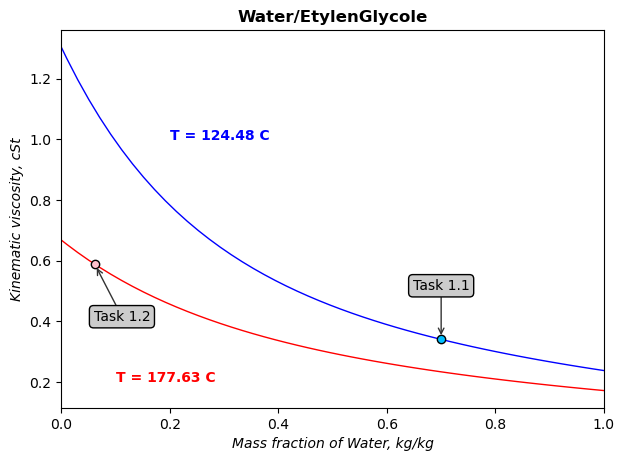

In [13]:
# Расчёт данных и построение графика
dt1 = get_viscosity('Water', 'EthyleneGlycol', Tsat1, [0, 1])
for mf in [[i, 1-i] for i in np.linspace(0.01,1,50)]:
    dt1 = np.append(dt1, get_viscosity('Water', 'EthyleneGlycol', Tsat1, mf), axis=0)

dt2 = get_viscosity('Water', 'EthyleneGlycol', Tsat2, [0, 1])
for mf in [[i, 1-i] for i in np.linspace(0.01,1,50)]:
    dt2 = np.append(dt2, get_viscosity('Water', 'EthyleneGlycol', Tsat2, mf), axis=0)

plotdata5([x1, x1_t12], [Tsat1, Tsat2], Nu_mix1, Nu_mix2, dt1, dt2)

##### Рис. 4

## Task 2

Determine the pressure in a half-filled tank with propane-butane 80/20 mixture (liquid phase) at a temperature of 300 K and the composition of the gas phase.

*Определите давление в наполовину заполненой емкости с пропан/бутановой смесью 80/20 (жидкая фаза) при температуре 300К и состав газовой фазы.*

#### Анализ задачи и допущения

Объектом является бинарная двухфазная термодинамическая система, находящаяся в равновесии.
Для этой системы задано три параметра: температура ($T$), состав жидкой фазы ($x_{propane}$, $x_{n-butane}$), объемные доли фаз в емкости.

Согласно правилу фаз Гиббса двухфазная бинарная термодинамическая система имеет две степени свободы, поэтому для определения равновесного давления в емкости достаточно использовать два заданных параметра: $T$, $x_{propane}$.

Из условия неясно в каких единицах указана концентрация компонентов. Ввиду того, что в технических приложениях в основном используют массовые доли, в дальнейшем примем что заданы массовые доли компонентов смеси:
$x_{propane}=0.8$;
$x_{n-butane}=0.2$.

In [14]:
# Set initial data
Mix2 = 'Propane' + '&' + 'Butane'
Tmix = 300  # K
x1 = 0.8    # kg/kg — mass fraction of substance 1
x2 = 1 - x1 # kg/kg — mass fraction of substance 2

#### Решение

Для решения поставленной задачи необходимо иметь уравнение состояние для соответствующей смеси.
В качестве такого удобно воспользоваться готовыми уравнениями состояния в следующих базах данных свойств веществ:
* [`REFPROP 10.0`](#REFPROP-10.0) (NIST)
* [`CoolProp`](#CoolProp) 6.4.3 (Open-source thermodynamic and transport properties database)

Из уравнения состояния на соответствующей изотерме насыщенной жидкой фазы при заданном составе находим равновесное давление в емкости. Зная давление в системе, по линии постоянного давления определяем состав паровой фазы на соответствующей изотерме насыщенного пара.

По базовому уравнению состояния в [`REFPROP 10.0`](#REFPROP-10.0) получим следующие результаты.

In [15]:
REFPROP = CP.AbstractState("REFPROP", Mix2)

# Задаём массовую концентрацию компонентов
REFPROP.set_mass_fractions([x1, x2])

# Давление насыщения для жидкой фазы
REFPROP.update(CP.QT_INPUTS, 0, Tmix)
Psat_R = REFPROP.p()*1e-5

# Состав паровой фазы
REFPROP.set_mole_fractions(REFPROP.mole_fractions_vapor())
y1_R = REFPROP.get_mass_fractions()[0]

print('Концентрация пропана в паровой фазе -', np.round(y1_R,4))
print('Давление насыщения -', np.round(Psat_R,3), 'bar')

Концентрация пропана в паровой фазе - 0.9239
Давление насыщения - 8.668 bar


По базовому уравнению состояния в [`CoolProp`](#CoolProp) получим следующие результаты.

In [16]:
HEOS = CP.AbstractState("HEOS", Mix2)

# Задаём массовую концентрацию компонентов
HEOS.set_mass_fractions([x1, x2])

# Давление насыщения для жидкой фазы
HEOS.update(CP.QT_INPUTS, 0, Tmix)
Psat = HEOS.p()*1e-5

# Состав паровой фазы
HEOS.set_mole_fractions(HEOS.mole_fractions_vapor())
y1 = HEOS.get_mass_fractions()[0]

print('Концентрация пропана в паровой фазе -', np.round(y1,4))
print('Давление насыщения -', np.round(Psat,3), 'bar')

Концентрация пропана в паровой фазе - 0.9239
Давление насыщения - 8.668 bar


Отличия в этих результатах несущественны:

In [17]:
print('Относительная разница в давлении составляет -',
      (Psat-Psat_R)/Psat_R*100, '%')
print('Разница в концентрации пропана в паровой фазе -',
      (y1-y1_R))

Относительная разница в давлении составляет - 3.13289609500721e-07 %
Разница в концентрации пропана в паровой фазе - 7.608036423079056e-11


На рисунке ниже показаны найденные значения давление насыщения и соответствующего состава фаз.

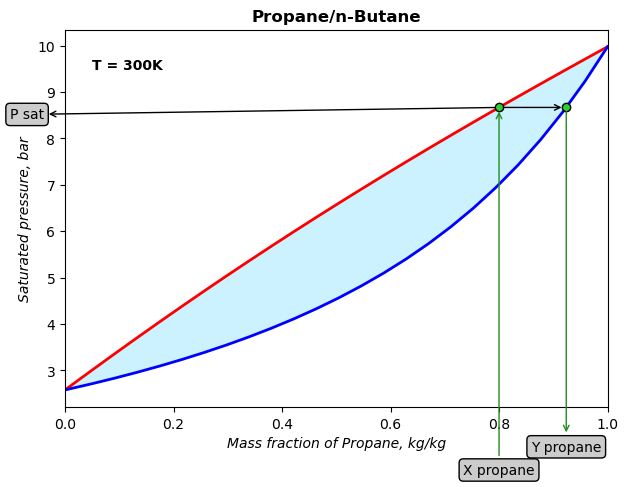

In [18]:
# Расчёт данных и построение графика
dt = get_psat(HEOS, Tmix, [0, 1])

for mf in [[i, 1-i] for i in np.linspace(0.01,1,25)]:
    dt = np.append(dt, get_psat(HEOS, Tmix, mf), axis=0)

plotdata(Tmix, x1, y1, Psat, dt)

## Источники

##### REFPROP 10.0
https://www.nist.gov/srd/refprop

##### CoolProp
http://www.coolprop.org/index.html

##### ASHARAE Handbook 2021
ASHRAE Handbook 2021. Fundamentals. SI Edition. ASHRAE, 2021. — 1024 p. — ISBN 978-1-947192-90-4; ISSN 1523-7230.

##### Рид 1982
Рид Р., Праусниц Дж., Шервуд Т. Свойства газов и жидкостей. Справочное пособие. — 3-е изд., переработанное и дополненное. — Л.: Химия, 1982. — 592 с.: ил.